In [2]:
import os

# Get the absolute path of the dataset
dataset_dir = os.path.abspath('../datasets/FINAL DATASET')
# dataset_dir = "C:\\Users\\rektplorer64\\OneDrive\\Pictures\\Wallpapers"
dataset_dir_file_folder_list = os.listdir(dataset_dir)

print(dataset_dir_file_folder_list)

['barbecued_red_pork_in_sauce_with_rice', 'caesar_salad', 'charcoal-boiled_pork_neck', 'chow_mein', 'coconut_milk_soup', 'countFileInEachClass.py', 'crispy_pork_with_kale_with_rice', 'fried_chicken_with_rice', 'fried_mussel_pancakes', 'fried_pork_with_rice', 'fried_rice', 'green_curry', 'hamburger', 'hot_and_sour_fish_and_vegetable_ragout', 'kebab', 'khao_soi', 'noodles', 'noodles_without_soup', 'noodles_with_fish_curry', 'omelette', 'onion_rings', 'pad_see_ew', 'pad_thai', 'peking_duck', 'pizza', 'rice_crispy_pork', 'rice_topped_with_stir_fried_meat_and_basil', 'spaghetti_bolognese', 'spaghetti_carbonara', 'spicy_chicken_salad_with_rice', 'spicy_stir_fried_pork_with_red_curry_paste', 'spring_rolls', 'steak', 'steak_with_rice', 'steamed_chicken_with_rice', 'steamed_rice_roll', 'stewed_pork_leg', 'thai_papaya_salad', 'yellow_curry']


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory

from keras.preprocessing.image import ImageDataGenerator

import preprocess_crop

batch_size = 25
# dataset_ds = image_dataset_from_directory(
#     dataset_dir,
#     labels="inferred",
#     label_mode="int",
#     class_names=None,
#     color_mode="rgb",
#     batch_size=32, 
#     image_size=(256, 256),
#     shuffle=True,
#     seed=None,
#     validation_split=None,
#     subset=None,
#     interpolation="bilinear",
#     follow_links=False,
# )

data_augmentation_params = dict(
    rotation_range=100,
    channel_shift_range=120,
    horizontal_flip=True,
    brightness_range=(0.9, 1.2),
    shear_range=0.0,
    zoom_range=0.0,
    validation_split=0.1
)

dataset_gen = ImageDataGenerator(**data_augmentation_params)

print('\nTrainning Set')
dataset_train_iterator = dataset_gen.flow_from_directory(
    dataset_dir,
    target_size = (256, 256),
    batch_size  = batch_size,
    class_mode  = 'categorical',
    interpolation = 'lanczos:random', # <--------- random crop
    shuffle = True,
    subset='training'
)
print('Total:', dataset_train_iterator.n, 'images')

print('\nValidation Set')
dataset_test_iterator = dataset_gen.flow_from_directory(
    dataset_dir,
    target_size = (256, 256),
    batch_size  = batch_size,
    class_mode  = 'categorical',
    interpolation = 'lanczos:random', # <--------- random crop
    shuffle = True,
    subset='validation'
)
print('Total:', dataset_test_iterator.n, 'images')

# print(dataset_iterator)

class_names = list(dataset_train_iterator.class_indices)
print('\n', class_names)


Trainning Set
Found 8550 images belonging to 38 classes.
Total: 8550 images

Validation Set
Found 950 images belonging to 38 classes.
Total: 950 images

 ['barbecued_red_pork_in_sauce_with_rice', 'caesar_salad', 'charcoal-boiled_pork_neck', 'chow_mein', 'coconut_milk_soup', 'crispy_pork_with_kale_with_rice', 'fried_chicken_with_rice', 'fried_mussel_pancakes', 'fried_pork_with_rice', 'fried_rice', 'green_curry', 'hamburger', 'hot_and_sour_fish_and_vegetable_ragout', 'kebab', 'khao_soi', 'noodles', 'noodles_with_fish_curry', 'noodles_without_soup', 'omelette', 'onion_rings', 'pad_see_ew', 'pad_thai', 'peking_duck', 'pizza', 'rice_crispy_pork', 'rice_topped_with_stir_fried_meat_and_basil', 'spaghetti_bolognese', 'spaghetti_carbonara', 'spicy_chicken_salad_with_rice', 'spicy_stir_fried_pork_with_red_curry_paste', 'spring_rolls', 'steak', 'steak_with_rice', 'steamed_chicken_with_rice', 'steamed_rice_roll', 'stewed_pork_leg', 'thai_papaya_salad', 'yellow_curry']


2 25 256 256 3


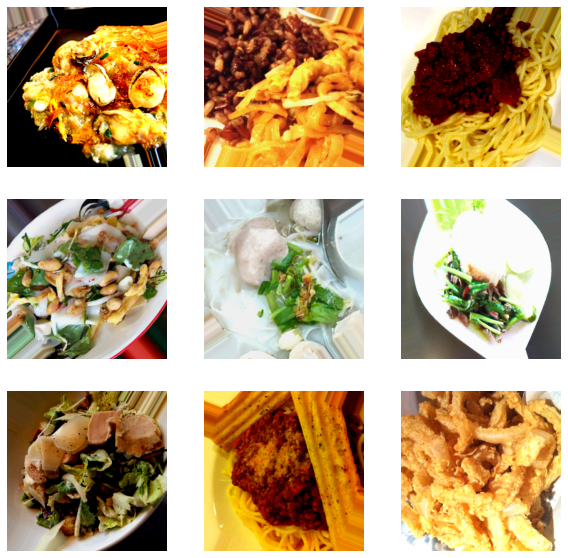

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy 

plt.figure(figsize=(10, 10))

data = dataset_train_iterator.next()
print(len(data), len(data[0]), len(data[0][0]), len(data[0][0][0]), len(data[0][0][0][0]))
# print(dataset_ds.next())

for i in range(9):  
  image = numpy.array(list(data[0][i])).astype("uint8")

  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(numpy.array(list(image)).astype("uint8"))
  # plt.title(class_names[labels[i]])
  plt.axis("off")

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(128, 9, activation = 'relu', input_shape=dataset_train_iterator.image_shape, padding='same'))
# model.add(Conv2D(128, 9, activation = 'relu', padding='same'))
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(16, (5, 5), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(16, (5, 5), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(16, 4, activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(16, 4, activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(180, activation = 'relu'))
# model.add(Dense(180, activation = 'relu'))
# model.add(Dense(180, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(100, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(len(class_names), activation = 'softmax')) #Last layer with one output per class


opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
model.summary()



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 256, 256, 128)     31232     
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 128, 128, 128)     0         
_________________________________________________________________
batch_normalization_62 (Batc (None, 128, 128, 128)     512       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 128, 128, 64)      204864    
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_63 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 64, 64, 64)       

In [15]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

# early = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, mode='auto', min_lr=0.00001)
model.fit(dataset_train_iterator,
        steps_per_epoch=int(np.ceil(dataset_train_iterator.n / batch_size)),
        epochs=100,
        validation_data=dataset_test_iterator,
        validation_steps=int(np.ceil(dataset_test_iterator.n / batch_size)),
        verbose=1, 
          callbacks=[
# #               early, 
              reduce]
         )

Epoch 1/100
342/342 [==============================] - 318s 929ms/step - loss: 3.6465 - accuracy: 0.0331 - val_loss: 3.6359 - val_accuracy: 0.0295
Epoch 2/100
342/342 [==============================] - 255s 747ms/step - loss: 3.6100 - accuracy: 0.0412 - val_loss: 3.6084 - val_accuracy: 0.0463
Epoch 3/100
342/342 [==============================] - 276s 808ms/step - loss: 3.5349 - accuracy: 0.0568 - val_loss: 3.5056 - val_accuracy: 0.0768
Epoch 4/100
342/342 [==============================] - 253s 739ms/step - loss: 3.4172 - accuracy: 0.0820 - val_loss: 3.4490 - val_accuracy: 0.0716
Epoch 5/100
342/342 [==============================] - 255s 745ms/step - loss: 3.3190 - accuracy: 0.0958 - val_loss: 3.3681 - val_accuracy: 0.0926
Epoch 6/100
342/342 [==============================] - 268s 783ms/step - loss: 3.2288 - accuracy: 0.1085 - val_loss: 3.3594 - val_accuracy: 0.1137
Epoch 7/100
342/342 [==============================] - 259s 756ms/step - loss: 3.1397 - accuracy: 0.1291 - val_loss: 3

KeyboardInterrupt: 

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()